In [3]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random

In [4]:
def f(x:float) -> float:
    return ((-1.52 * (x**3)) + (212*(x**2)) + (162*x)) - 2000000

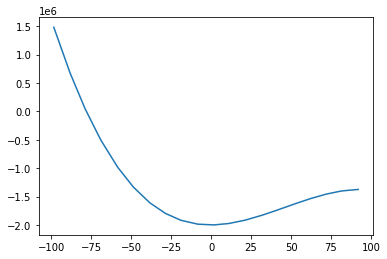

In [5]:
x_vals = np.array([(i+random.random()) for i in range(-99,99,10)])
y_vals = np.array([f(x) for x in x_vals])

plt.plot(x_vals,y_vals)
plt.show()


In [6]:
class Solution:

    def __init__(self, std_dev:float, parent=None) -> None:

        self.std = std_dev
        
        if parent:
            self.gene = float(parent.gene)
            self.mutate()
            self.fit =  abs(f(self.gene))

        else:
            self.gene = float(np.random.normal(0,self.std))
            self.fit =  abs(f(self.gene))
        

    def mutate(self):
        r = float(np.random.normal(0,self.std))
        self.gene = self.gene + r
        

In [18]:
def EA(mu, sigma, std_dev, max_gen):

    parents = [Solution(std_dev=std_dev) for _ in range(mu)]
    children = []
    pool = parents
    pool.sort(key=lambda x: x.fit)
    # 1/5 Rule: adapt std_deviation of mutation if the number of improvements through mutations per generations is not = ~1/5 
    ratio = 0.2


    for _ in range(max_gen):

        # count improvements
        improvs = 0

        for c in range(sigma):

            child = Solution(parent=parents[c], std_dev=std_dev)

            if child.fit < parents[c].fit:
                improvs +=1

            children.append(child)


        if round(improvs/sigma, 2) < ratio:
            std_dev *= 0.75

        elif round(improvs/sigma, 2) > ratio:
            std_dev *= 1.25

        
        pool = parents + children
        pool.sort(key=lambda x: x.fit)

        parents = list(pool[:mu])
        children = []
        print(f"x: {parents[0].gene:<30.26f}     y: {parents[0].fit:<30.26f}      std_dev: {std_dev:<30.26f}")



EA(40,20,100,100)
        


x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 125.00000000000000000000000000
x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 93.75000000000000000000000000 
x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 70.31250000000000000000000000 
x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 52.73437500000000000000000000 
x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 52.73437500000000000000000000 
x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 39.55078125000000000000000000 
x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 49.43847656250000000000000000 
x: -78.67219011052756627577764448     y: 39518.37559171463362872600555420      std_dev: 37.07885742187500000000000000 
x: -78.21675165529003947995079216     y: 11664.3